In [1]:
import pandas as pd
messages=pd.read_csv('SMSSpamCollection.txt',
                    sep='\t',names=["label","message"])

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ishas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ishas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [5]:
def preprocess_text(text, method="stem"):
    """Preprocess text using stemming or lemmatization."""
    review = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Tokenize
    if method == "stem":
        review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    elif method == "lemma":
        review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
    return ' '.join(review)


In [6]:
# Prepare data for stemming and lemmatization
corpus_stem = [preprocess_text(msg, method="stem") for msg in messages['message']]
corpus_lemma = [preprocess_text(msg, method="lemma") for msg in messages['message']]

In [7]:
## Output Features
y=pd.get_dummies(messages['label'])
y=y.iloc[:,0].values

In [8]:
# Train-Test Split
X_train_stem, X_test_stem, y_train, y_test = train_test_split(corpus_stem, y, test_size=0.2, random_state=42)
X_train_lemma, X_test_lemma, _, _ = train_test_split(corpus_lemma, y, test_size=0.2, random_state=42)


In [9]:
# TF-IDF Vectorization
tv = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))
X_train_stem_vec = tv.fit_transform(X_train_stem).toarray()
X_test_stem_vec = tv.transform(X_test_stem).toarray()

In [10]:
X_train_lemma_vec = tv.fit_transform(X_train_lemma).toarray()
X_test_lemma_vec = tv.transform(X_test_lemma).toarray()

In [11]:
model_stem = MultinomialNB()
model_lemma = MultinomialNB()

In [12]:
model_stem.fit(X_train_stem_vec, y_train)
model_lemma.fit(X_train_lemma_vec, y_train)

MultinomialNB()

In [13]:
# Predictions
y_pred_stem = model_stem.predict(X_test_stem_vec)
y_pred_lemma = model_lemma.predict(X_test_lemma_vec)

In [14]:
accuracy_stem = accuracy_score(y_test, y_pred_stem)
accuracy_lemma = accuracy_score(y_test, y_pred_lemma)

In [15]:
print("Stemming Model Classification Report:")
print(classification_report(y_test, y_pred_stem))

Stemming Model Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.87      0.92       149
        True       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [16]:
print("Lemmatization Model Classification Report:")
print(classification_report(y_test, y_pred_lemma))

Lemmatization Model Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.87      0.93       149
        True       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [17]:
# Visualization
import matplotlib.pyplot as plt

In [18]:
# Accuracy comparison
methods = ['Stemming', 'Lemmatization']
accuracies = [accuracy_stem, accuracy_lemma]

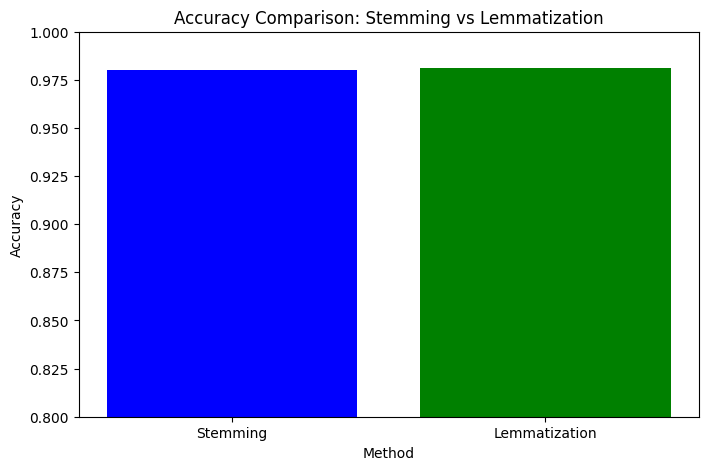

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(methods, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison: Stemming vs Lemmatization')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust based on expected range
plt.show()
